In [ ]:
#Importing all the neccessary libraries
import numpy as np   #Numerical analysis
import pandas as pd  #Data manipulation
import matplotlib.pyplot as plt  # Data visualization
import seaborn as sns

#Library for nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
import string
string.punctuation
from wordcloud import WordCloud


from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split

#ML Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df=pd.read_csv('/content/dd.csv')
df.sample(5)

,LABEL,TEXT
1126,ham,what number do u live at? Is it 11?
7831,Smishing,"Dear customer, Due to BVN system upgrade, your..."
332,Smishing,You are now unsubscribed all services. Get ton...
6379,Smishing,\tYOU HAVE WON! As a valued Vodafone customer ...
339,ham,Can u look 4 me in da lib i got stuff havent f...


In [ ]:
df.shape

(9702, 2)

In [ ]:
#Steps:
#  1. Data cleaning
#  2. EDA
#  3. Text Preprocessing
#  4. Model building
#  5. Evaluation
#  6. Improvement
#  7. Website
#  8. Deploy

#**1**.Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9702 entries, 0 to 9701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   LABEL   9702 non-null   object
 1   TEXT    9702 non-null   object
dtypes: object(2)
memory usage: 151.7+ KB


In [ ]:
# Renaming Columns
df.rename(columns={'LABEL':'target','TEXT':'text'},inplace=True)
df.sample(5)

,target,text
8878,Smishing,\tU have a secret admirer who is looking 2 mak...
7438,Smishing,"\tour mobile number has won £5000, to claim ca..."
7286,Smishing,Sunshine Hols. To claim ur med holiday send a ...
3158,Smishing,88066 FROM 88066 LOST 3POUND HELP
6793,Smishing,\t07732584351 - Rodger Burns - MSG = We tried ...


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
df['target'] = encoder.fit_transform(df['target'])

In [ ]:
df['target'].unique()

array([1, 0])

In [ ]:
df.head()

,target,text
0,1,Your opinion about me? 1. Over 2. Jada 3. Kusr...
1,1,What's up? Do you want me to come online? If y...
2,1,So u workin overtime nigpun?
3,1,"Also sir, i sent you an email about how to log..."
4,0,Please Stay At Home. To encourage the notion o...


In [ ]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

#2.EDA

In [ ]:
df['target'].value_counts()

0    4858
1    4844
Name: target, dtype: int64

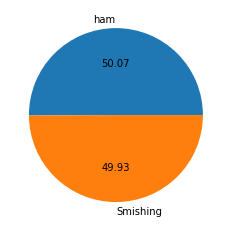

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','Smishing'],autopct= '%0.2f')
plt.show()

In [ ]:
# import nltk
# nltk.download('punkt')

In [ ]:
# num_characters
df['num_characters'] = df['text'].apply(len)

In [ ]:
# num_words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
# num_sentences
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,1,Your opinion about me? 1. Over 2. Jada 3. Kusr...,136,37,11
1,1,What's up? Do you want me to come online? If y...,79,20,3
2,1,So u workin overtime nigpun?,28,6,1
3,1,"Also sir, i sent you an email about how to log...",173,37,3
4,0,Please Stay At Home. To encourage the notion o...,152,27,4


In [ ]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,9702.000000,9702.000000,9702.000000
mean,104.126572,21.932385,2.256854
std,57.078005,11.788325,1.450269
min,2.000000,1.000000,1.000000
25%,51.000000,12.000000,1.000000
50%,113.000000,23.000000,2.000000
75%,149.000000,29.000000,3.000000
max,910.000000,220.000000,28.000000


In [ ]:
# Smishing
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4858.000000,4858.000000,4858.000000
mean,137.452244,26.676204,2.710580
std,33.734089,7.208642,1.471511
min,18.000000,2.000000,1.000000
25%,123.000000,23.000000,2.000000
50%,145.000000,27.000000,2.000000
75%,156.000000,31.000000,4.000000
max,384.000000,75.000000,8.000000


In [ ]:
# Ham(not-smishing)
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4844.000000,4844.000000,4844.000000
mean,70.704583,17.174855,1.801817
std,56.154333,13.454836,1.275878
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [ ]:
# import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

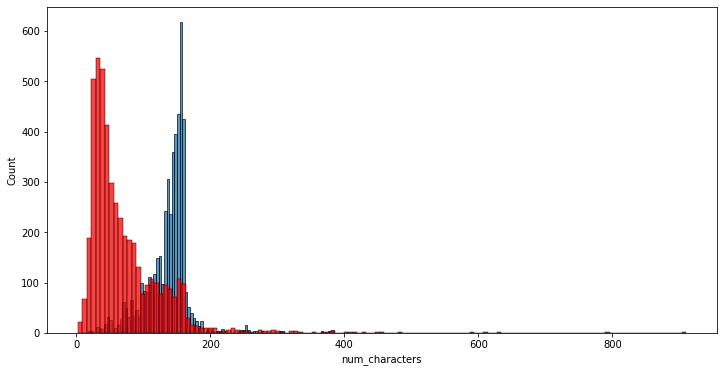

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

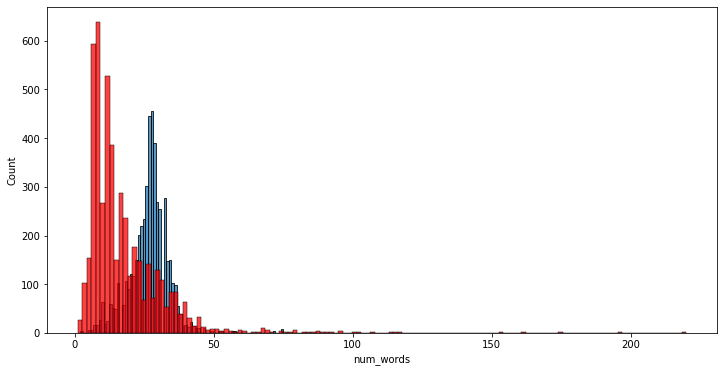

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

<AxesSubplot:xlabel='num_sentences', ylabel='Count'>

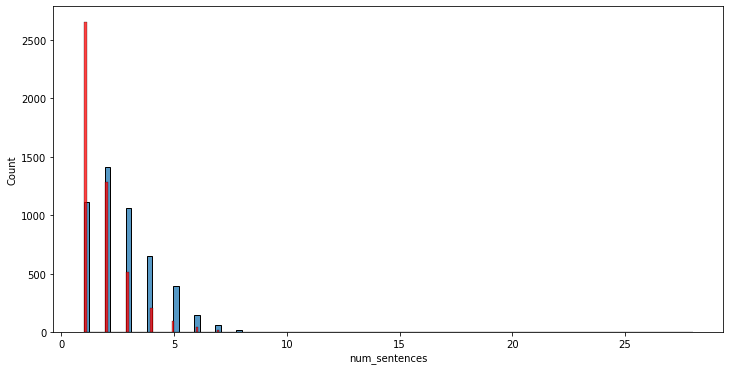

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_sentences'])
sns.histplot(df[df['target'] == 1]['num_sentences'],color='red')

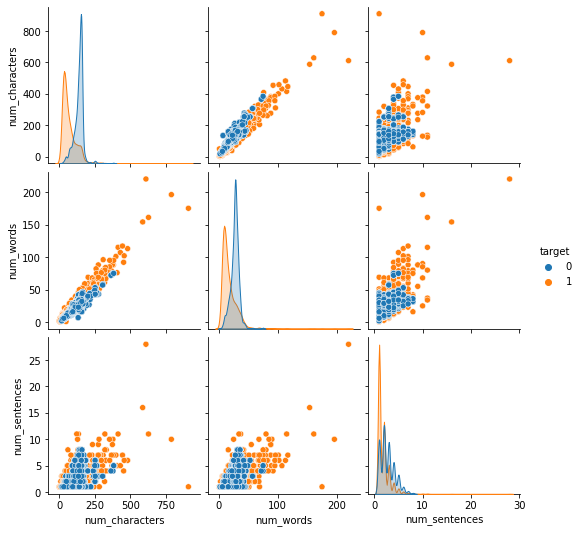

In [ ]:
sns.pairplot(df,hue='target')

<AxesSubplot:>

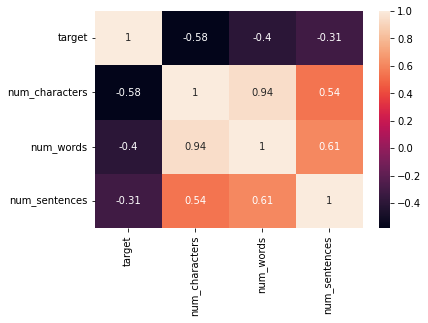

In [ ]:
sns.heatmap(df.corr(),annot=True)

#**3**. Data Preprocessing

*   Lower case
*   Tokenization
*   Removing special characters
*   Removing stop words and punctuation
*   Stemming




In [ ]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [ ]:
# from nltk.corpus import stopwords
# stopwords.words('english')
# import string
# string.punctuation
# from nltk.stem.porter import PorterStemmer
# ps = PorterStemmer()
# df['text'][10]

In [ ]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [ ]:
ps.stem('loving')

'love'

In [ ]:
df['transformed_text'] = df['text'].apply(transform_text)
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,1,Your opinion about me? 1. Over 2. Jada 3. Kusr...,136,37,11,opinion jada kusruthi lovabl silent spl charac...
1,1,What's up? Do you want me to come online? If y...,79,20,3,want come onlin free talk
2,1,So u workin overtime nigpun?,28,6,1,u workin overtim nigpun
3,1,"Also sir, i sent you an email about how to log...",173,37,3,also sir sent email log usc payment portal sen...
4,0,Please Stay At Home. To encourage the notion o...,152,27,4,pleas stay home encourag notion stay home citi...


In [ ]:
# from wordcloud import WordCloud

In [ ]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='black')

In [ ]:
Smishing_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

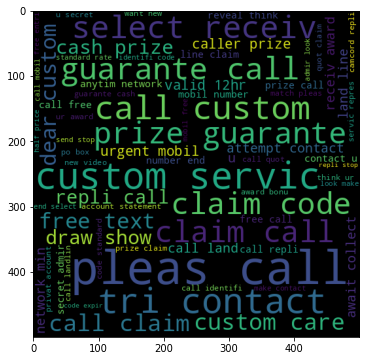

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(Smishing_wc)

In [ ]:
NotSmishing_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

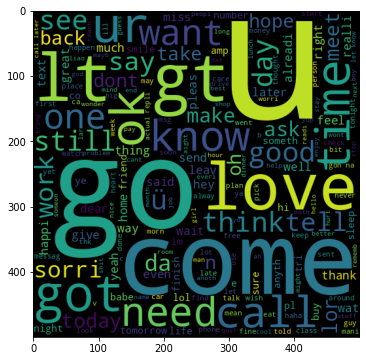

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(NotSmishing_wc)

In [ ]:
Smishing_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        Smishing_corpus.append(word)
len(Smishing_corpus)

70312

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


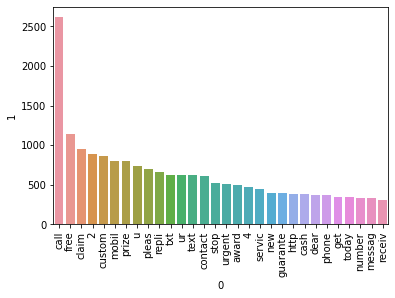

In [ ]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(Smishing_corpus).most_common(30))[0],pd.DataFrame(Counter(Smishing_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
NotSmishing_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        NotSmishing_corpus.append(word)
len(NotSmishing_corpus)

38238

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


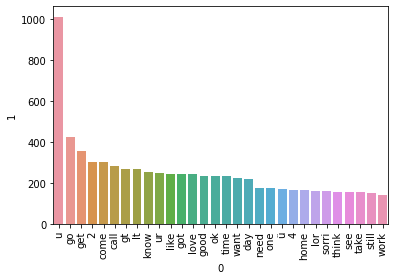

In [ ]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(NotSmishing_corpus).most_common(30))[0],pd.DataFrame(Counter(NotSmishing_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

#**4**. Model Building

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
x.shape

(9702, 3000)

In [ ]:
y = df['target'].values

In [ ]:
# from sklearn.model_selection import train_test_split

In [ ]:
# from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
# from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
rfc = RandomForestClassifier()

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print('Accuracy Score :',accuracy_score(y_test,y_pred1))
print('confusion_matrix :',confusion_matrix(y_test,y_pred1))
print('precision_score :',precision_score(y_test,y_pred1,pos_label='positive',
                                           average='micro'))

Accuracy Score : 0.9675425038639877
confusion_matrix : [[910  37]
 [ 26 968]]
precision_score : 0.9675425038639877


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [ ]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print('Accuracy Score :',accuracy_score(y_test,y_pred2))
print('Confusion Matrix :',confusion_matrix(y_test,y_pred2))
print('Precision Score :',precision_score(y_test,y_pred2,pos_label='positive'
                                           ,average='micro'))

Accuracy Score : 0.9654817104585265
Confusion Matrix : [[914  33]
 [ 34 960]]
Precision Score : 0.9654817104585265


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [ ]:
rfc.fit(x_train,y_train)
y_pred4 = rfc.predict(x_test)
print('Accuracy Score :',accuracy_score(y_test,y_pred4))
print('Confusion Matrix :',confusion_matrix(y_test,y_pred4))
print('Precision Score :',precision_score(y_test,y_pred4,pos_label='positive'
                                           ,average='micro'))

Accuracy Score : 0.9953632148377125
Confusion Matrix : [[944   3]
 [  6 988]]
Precision Score : 0.9953632148377125


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [ ]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print('Accuracy Score :',accuracy_score(y_test,y_pred3))
print('Confusion Matrix :',confusion_matrix(y_test,y_pred3))
print('Precision Score :',precision_score(y_test,y_pred3,pos_label='positive'
                                           ,average='micro'))

Accuracy Score : 0.98145285935085
Confusion Matrix : [[912  35]
 [  1 993]]
Precision Score : 0.98145285935085


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred,pos_label='positive'
                                           ,average='micro')

    return accuracy,precision

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)

    print("For ",name)
    print("Accuracy : ",current_accuracy)
    print("Precision : ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


For  SVC
Accuracy :  0.9860896445131375
Precision :  0.9860896445131375


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


For  KN
Accuracy :  0.9299330242143226
Precision :  0.9299330242143226
For  NB
Accuracy :  0.9654817104585265
Precision :  0.9654817104585265


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


For  DT
Accuracy :  0.8475012879958784
Precision :  0.8475012879958784
For  LR
Accuracy :  0.9732096857290057
Precision :  0.9732096857290057


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


For  RF
Accuracy :  0.9958784131890778
Precision :  0.9958784131890778


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


For  AdaBoost
Accuracy :  0.9392065945388974
Precision :  0.9392065945388974


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


For  BgC
Accuracy :  0.9773312725399279
Precision :  0.9773312725399279


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


For  ETC
Accuracy :  0.9958784131890778
Precision :  0.9958784131890778


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


For  GBDT
Accuracy :  0.9124162802679031
Precision :  0.9124162802679031
For  xgb
Accuracy :  0.9536321483771252
Precision :  0.9536321483771252


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
5,RF,0.995878,0.995878
8,ETC,0.995878,0.995878
0,SVC,0.986090,0.986090
7,BgC,0.977331,0.977331
4,LR,0.973210,0.973210
2,NB,0.965482,0.965482
10,xgb,0.953632,0.953632
6,AdaBoost,0.939207,0.939207
1,KN,0.929933,0.929933
9,GBDT,0.912416,0.912416


In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,RF,Accuracy,0.995878
1,ETC,Accuracy,0.995878
2,SVC,Accuracy,0.986090
3,BgC,Accuracy,0.977331
4,LR,Accuracy,0.973210
5,NB,Accuracy,0.965482
6,xgb,Accuracy,0.953632
7,AdaBoost,Accuracy,0.939207
8,KN,Accuracy,0.929933
9,GBDT,Accuracy,0.912416


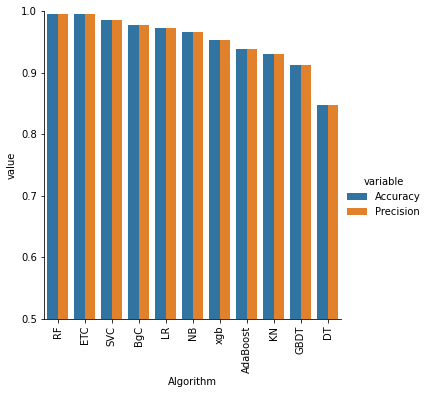

In [ ]:
sns.catplot(x = 'Algorithm', y='value',hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# model improve
# 1. Change the max_features parameter of TfIdf
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)
new_df = performance_df.merge(temp_df,on='Algorithm')
new_df_scaled = new_df.merge(temp_df,on='Algorithm')
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,RF,0.995878,0.995878,0.995878,0.995878,0.995878,0.995878,0.995878,0.995878
1,ETC,0.995878,0.995878,0.995878,0.995878,0.995878,0.995878,0.995878,0.995878
2,SVC,0.986090,0.986090,0.986090,0.986090,0.986090,0.986090,0.986090,0.986090
3,BgC,0.977331,0.977331,0.977331,0.977331,0.977331,0.977331,0.977331,0.977331
4,LR,0.973210,0.973210,0.973210,0.973210,0.973210,0.973210,0.973210,0.973210
5,NB,0.965482,0.965482,0.965482,0.965482,0.965482,0.965482,0.965482,0.965482
6,xgb,0.953632,0.953632,0.953632,0.953632,0.953632,0.953632,0.953632,0.953632
7,AdaBoost,0.939207,0.939207,0.939207,0.939207,0.939207,0.939207,0.939207,0.939207
8,KN,0.929933,0.929933,0.929933,0.929933,0.929933,0.929933,0.929933,0.929933
9,GBDT,0.912416,0.912416,0.912416,0.912416,0.912416,0.912416,0.912416,0.912416


#**5**. Final Model Selection

In [ ]:
# create a dictionary of the final models
final_models = {'SVC': SVC(kernel='sigmoid', gamma=1.0),
                'NB': MultinomialNB(),
                'ETC' :ExtraTreesClassifier(n_estimators=50, random_state=2),
                'RF':RandomForestClassifier(n_estimators=50, random_state=2)}

In [ ]:
import time

def classify(clf, x_train, x_test, y_train, y_test):
    y_pred = clf.fit(x_train, y_train).predict(x_test)
    precision = precision_score(y_test, y_pred)
    train_accuracy = clf.score(x_train, y_train)
    test_accuracy = accuracy_score(y_test, y_pred)
    return precision, train_accuracy, test_accuracy

for name, clf in final_models.items():
    i_precision, i_train_accuracy, i_test_accuracy = classify(clf, x_train, x_test, y_train, y_test)

    # check the time
    start = time.time()

    # fit and predict
    y_pred = clf.fit(x_train, y_train).predict(x_test)

    # check the time
    end = time.time()

    # print out the scores and classification reports
    print('[{}]\nProcessing Time: {} secs | Test Accuracy: {} | Precision: {}\n'.format(name,
                                                                                            round(end-start, 2),
                                                                                            round(i_test_accuracy, 2),
                                                                                            round(i_precision, 2)))

[SVC]
Processing Time: 55.61 secs | Test Accuracy: 0.99 | Precision: 0.98

[NB]
Processing Time: 0.2 secs | Test Accuracy: 0.97 | Precision: 0.97

[ETC]
Processing Time: 23.18 secs | Test Accuracy: 1.0 | Precision: 0.99

[RF]
Processing Time: 8.13 secs | Test Accuracy: 1.0 | Precision: 1.0



In [ ]:
#random forest classifier
rf=RandomForestClassifier(max_features=0.2)
rf.fit(x_train,y_train)

RandomForestClassifier(max_features=0.2)

In [ ]:
#support vector machine classifier
svm=SVC(kernel='sigmoid', gamma=1.0)
svm.fit(x_train,y_train)

SVC(gamma=1.0, kernel='sigmoid')

In [ ]:
#ExtraTreesClassifier
ETC=ExtraTreesClassifier(n_estimators=50, random_state=2)
ETC.fit(x_train,y_train)

ExtraTreesClassifier(n_estimators=50, random_state=2)

In [ ]:
#KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
#MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train,y_train)

MultinomialNB()

In [ ]:
#DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
# LogisticRegression
lrc = LogisticRegression(solver='liblinear', penalty='l1')
lrc.fit(x_train,y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [ ]:
#AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
abc.fit(x_train,y_train)

AdaBoostClassifier(random_state=2)

In [ ]:
#BaggingClassifier
bc = BaggingClassifier(n_estimators=50, random_state=2)
bc.fit(x_train,y_train)

BaggingClassifier(n_estimators=50, random_state=2)

In [ ]:
#GradientBoostingClassifier
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
gbdt.fit(x_train,y_train)

GradientBoostingClassifier(n_estimators=50, random_state=2)

In [ ]:
#XGBClassifier
xgb = XGBClassifier(n_estimators=50,random_state=2)
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=2, ...)

#Plot ROC Curve for each classifier

In [ ]:
def plot_roc(xtest,ytest,models):

    #models object should be a dictionary comprising of name of model and the model object
    for name,model in models.items():

        if hasattr(model,'decision_function'):
            probs=model.decision_function(x_test)
        elif hasattr(model,'predict_proba'):
            probs=model.predict_proba(x_test) [:,1]
        fpr,tpr,threshold=roc_curve(y_test,probs)
        roc_auc=auc(fpr,tpr)
        print('ROC AUC=%0.2f'%roc_auc)
        plt.plot(fpr,tpr,label='%s (AUC=%0.2f)'%(name,roc_auc))

    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'b--')
    plt.xlim([0,1])
    plt.ylim([0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

ROC AUC=1.00
ROC AUC=1.00
ROC AUC=1.00
ROC AUC=0.85
ROC AUC=1.00
ROC AUC=1.00
ROC AUC=1.00
ROC AUC=0.98
ROC AUC=1.00
ROC AUC=0.95
ROC AUC=0.99


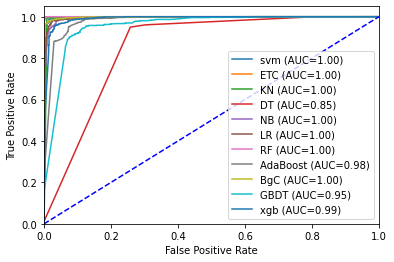

In [ ]:
#model evaluation
from sklearn.metrics import roc_curve,auc
models={'svm':svm,'ETC':etc,'KN' : knc,  'DT': dtc, 'NB': mnb,  'LR': lrc,'RF': rfc,'AdaBoost': abc, 'BgC': bc,'GBDT':gbdt,'xgb':xgb}
plot_roc(x_test,y_test,models)

In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(rfc,open('model.pkl','wb'))